In [36]:
pip install graphviz

In [37]:
import graphviz

In [31]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

df = pd.read_csv('/home/guido/gitprojects/datascience/aufg_11/aufg_11_data.csv')

In [32]:
df_new = pd.get_dummies(df) 

In [33]:
df_new.head()

,age_31...40,age_<=30,age_>40,income_High,income_Low,income_Medium,student_No,student_Yes,creditrating_Excellent,creditrating_Fair,buyspc_No,buyspc_Yes
0,0,1,0,1,0,0,1,0,0,1,1,0
1,0,1,0,1,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,1,0,0,1,0,1
4,0,0,1,0,1,0,0,1,0,1,0,1


In [19]:
df_new = df_new.drop(columns=['student_Yes', 'creditrating_Excellent', 'buyspc_Yes'])

In [20]:
df_new


,age_31...40,age_<=30,age_>40,income_High,income_Low,income_Medium,student_No,creditrating_Fair,buyspc_No
0,0,1,0,1,0,0,1,1,1
1,0,1,0,1,0,0,1,0,1
2,1,0,0,1,0,0,1,1,0
3,0,0,1,0,0,1,1,1,0
4,0,0,1,0,1,0,0,1,0
5,0,0,1,0,1,0,0,0,1
6,1,0,0,0,1,0,0,0,0
7,0,1,0,0,0,1,1,1,1
8,0,1,0,0,1,0,0,1,0
9,0,0,1,0,0,1,0,1,0


In [21]:
dt_values = df_new.values

In [22]:
dt_values

array([[0, 1, 0, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=uint8)

In [24]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(dt_values[:, 0:8] , dt_values[:, 8:9])

DecisionTreeClassifier(max_depth=10)

In [25]:
dt.classes_

array([0, 1], dtype=uint8)

In [26]:
print(df_new.columns.values.tolist())

['age_31...40', 'age_<=30', 'age_>40', 'income_High', 'income_Low', 'income_Medium', 'student_No', 'creditrating_Fair', 'buyspc_No']


In [38]:
def renderdt(dt):
    # generate graph
    dot_data = export_graphviz(
            dt,
            out_file=None,
            feature_names=dfc.columns.values[0:8].tolist(),
            class_names=['Buy', 'Doesnt Buy'], # buyspc_No 0: Buy | 1: Doesn't Buy
            leaves_parallel=True,
            filled=True,
            rotate=True
    )

    # render using dot/graphviz
    return graphviz.Source(dot_data)

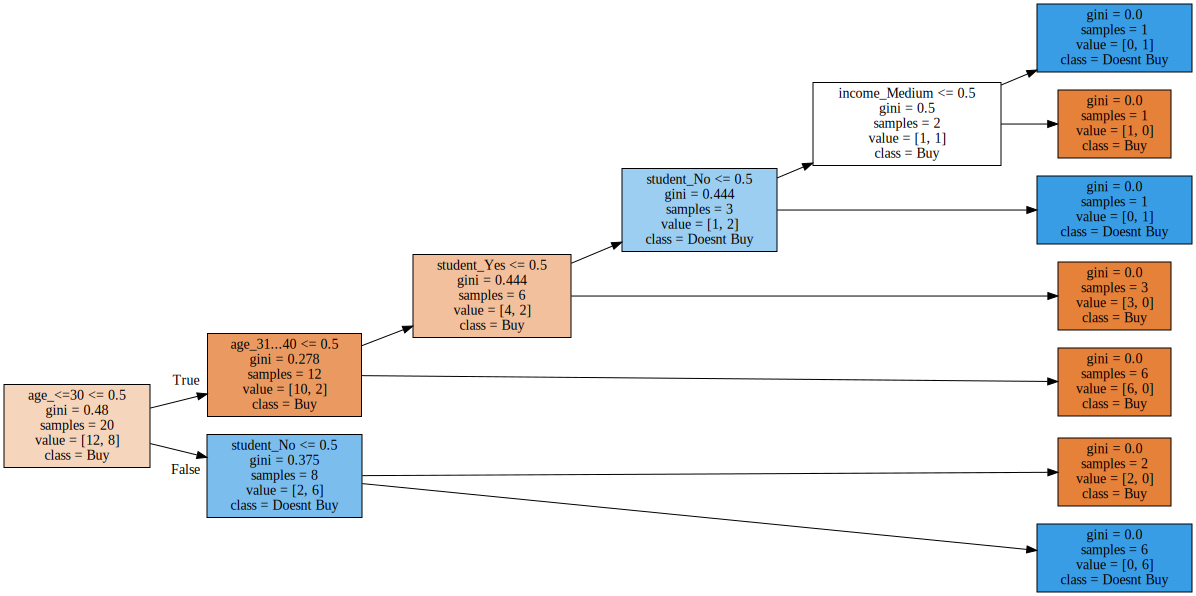

In [39]:
renderdt(dt)

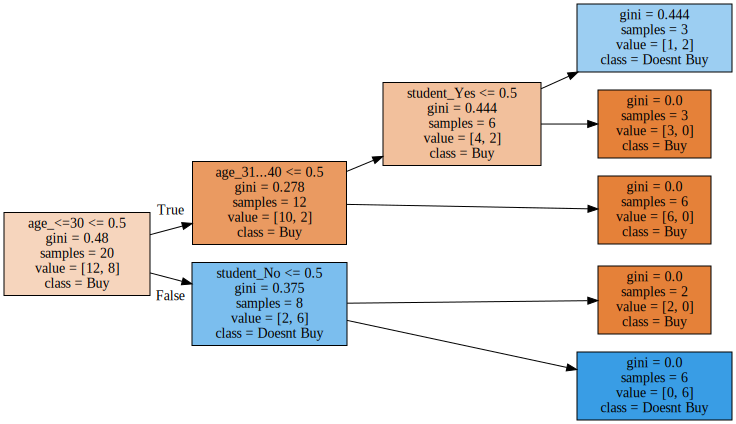

In [42]:
# decision tree reduce maxdepth= 3 (10 probably overfit as some leaves result in 1 sample)
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(dt_values[:, 0:8] , dt_values[:, 8:9])

renderdt(dt2)

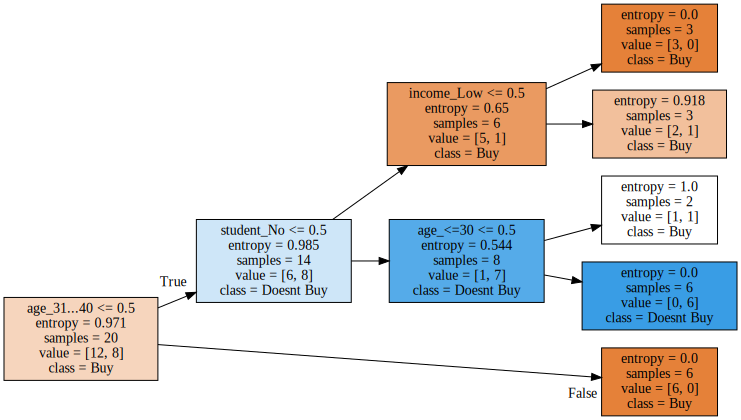

In [44]:
# decision tree maxdepth= 3 using information gain
dt2 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dt2.fit(dt_values[:, 0:8] , dt_values[:, 8:9])

renderdt(dt2)